# Tarefa 3 - Predição de CRA com Regressão

Nesta tarefa são construídos modelos preditivos de regressão para a predição do CRA de alunos de computação da UFCG ao final do curso baseados nas disciplinas do primeiro e segundo período utilizando o pacote **scikit learn**.


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew

%config InlineBackend.figure_format = 'png'
%matplotlib inline

In [70]:
train = pd.read_csv("treino.csv")
test = pd.read_csv("teste.csv")
train.head()

,matricula,Vetorial,LPT,P1,IC,LP1,Cálculo2,Discreta,P2,Grafos,Fís.Clássica,LP2,cra,Cálculo1
0,0cc3d63edf0b986cb87e345972857e15,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,9.4,8.477647,8.7
1,0d78246db769dc958ce19fc414050b2a,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,8.9,6.851724,7.0
2,0f5bb983df06b90337dc2c6301fef3f6,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,9.7,9.090588,8.6
3,1307a4421a67a497cea198e8ccfb97ee,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,9.0,7.283516,7.8
4,1432d50cf8519694ab992c414d90a130,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,8.2,7.205747,5.2


In [71]:
test.head()

,matricula,Cálculo1,Vetorial,LPT,P1,IC,LP1,Cálculo2,Discreta,P2,Grafos,Fís.Clássica,LP2,cra
0,066a1b8f51616bc9f7cf392aec12df2c,7.0,7.0,5.2,5.4,7.9,6.4,5.0,5.1,6.4,7.1,7.0,7.1,6.790805
1,07e605cabb25fcd348569d15324433cc,7.0,7.0,7.2,7.9,8.7,7.7,6.5,7.9,8.7,6.5,7.2,9.0,7.230337
2,1298de387b2af5489ce432fe854ae0f7,7.3,5.0,8.3,8.1,7.0,7.4,5.0,5.9,7.3,5.6,5.0,7.1,6.873626
3,1471a43df7d59a219ad739462d791410,7.0,6.8,6.4,7.0,8.6,8.2,6.3,8.0,7.9,5.4,9.0,8.9,7.444828
4,25f50af45fa0065a73077d8d047a7cd1,7.8,7.4,7.0,7.0,8.7,7.1,7.3,8.2,8.1,7.5,7.4,8.0,7.954118


In [72]:
Calc1 = train['Cálculo1']
train = train.drop('Cálculo1', axis=1)
train.insert(1, 'Cálculo1', Calc1)
train.head()

,matricula,Cálculo1,Vetorial,LPT,P1,IC,LP1,Cálculo2,Discreta,P2,Grafos,Fís.Clássica,LP2,cra
0,0cc3d63edf0b986cb87e345972857e15,8.7,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,9.4,8.477647
1,0d78246db769dc958ce19fc414050b2a,7.0,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,8.9,6.851724
2,0f5bb983df06b90337dc2c6301fef3f6,8.6,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,9.7,9.090588
3,1307a4421a67a497cea198e8ccfb97ee,7.8,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,9.0,7.283516
4,1432d50cf8519694ab992c414d90a130,5.2,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,8.2,7.205747


In [73]:
all_data = pd.concat((train.loc[:,:], test.loc[:,:]))
all_data.shape

(121, 14)

## Pré-processamento de dados
### Substituição de valores ausentes

Abaixo substituimos os valores numéricos faltantes (NaN's) pela média de suas respectivas colunas.

In [74]:
all_data = all_data.fillna(all_data.mean())

### Extração de *features*

A seguir adicionamos novas colunas (*features*) que possam ajudar na realização da predição do CRA. Aqui presume-se que a relação entre disciplinas semelhantes possa ter um impacto maior do que quando consideradas separadamente.

In [75]:
all_data['Math'] = all_data['Cálculo1'] * all_data['Vetorial'] * all_data['Cálculo2'] * all_data['Discreta']
all_data['Comp'] =  all_data['P1'] * all_data['IC'] * all_data['LP1'] * all_data['P2'] * all_data['Grafos'] * all_data['LP2']
all_data['Média1'] = pd.DataFrame(all_data.iloc[:,[0,1,2,3,4,5]]).mean(axis=1)
all_data['Média2'] = pd.DataFrame(all_data.iloc[:,[6,7,8,9,10,11]]).mean(axis=1)
all_data['MédiaGeral'] = pd.DataFrame(all_data.iloc[:,[15,16]]).mean(axis=1)
all_data['Per2'] = all_data['Média1'] + all_data['Média2'] * 2

all_data.head()

,matricula,Cálculo1,Vetorial,LPT,P1,IC,LP1,Cálculo2,Discreta,P2,Grafos,Fís.Clássica,LP2,cra,Math,Comp,Média1,Média2,MédiaGeral,Per2
0,0cc3d63edf0b986cb87e345972857e15,8.7,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,9.4,8.477647,5216.4504,477756.63936,9.08,8.366667,238882.85968,25.813333
1,0d78246db769dc958ce19fc414050b2a,7.0,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,8.9,6.851724,1774.1920,172056.62628,6.86,7.150000,86031.74314,21.160000
2,0f5bb983df06b90337dc2c6301fef3f6,8.6,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,9.7,9.090588,6584.1600,533653.77216,9.18,8.850000,266831.47608,26.880000
3,1307a4421a67a497cea198e8ccfb97ee,7.8,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,9.0,7.283516,2398.0320,221978.88720,7.44,7.633333,110993.16360,22.706667
4,1432d50cf8519694ab992c414d90a130,5.2,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,8.2,7.205747,1327.0400,68143.59900,7.36,6.183333,34075.47950,19.726667


### Transformação de dados

A seguir, analisaremos a distribuição dos dados à procura de caudas, a fim de transformá-los aplicando uma função logarítmica sobre os mesmos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A982ED0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0B55AF90>]], dtype=object)

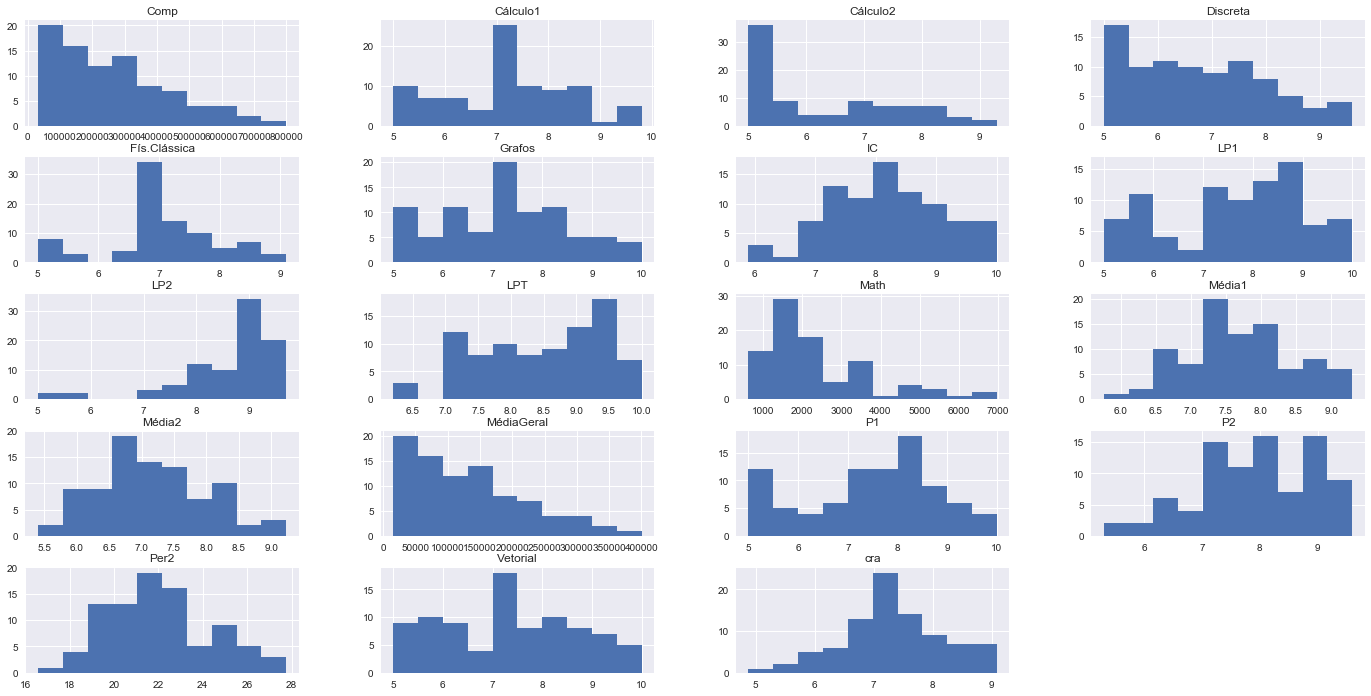

In [76]:
matplotlib.rcParams['figure.figsize'] = (24.0, 12.0)
train = all_data[:train.shape[0]]
train.hist()

Abaixo buscou-se identificar o *threshold* que separa as distribuições enviesadas das demais. Este *threshold*, para os dados aqui tratados, é o valor absoluto 0.5.

In [77]:
#Identificando o threshold dos gráficos enviesados

Calc2= pd.DataFrame(train.iloc[:,7].values)
Calc2 = skew(Calc2)
#Cauda à direita = 0.5

LP2= pd.DataFrame(train.iloc[:,12].values)
LP2 = skew(LP2)
#Cauda à esquerda = -1.9

Math = pd.DataFrame(train.iloc[:,14].values)
Math = skew(Math)
#Cauda à direita = 1.39

Comp = pd.DataFrame(train.iloc[:,15].values)
Comp = skew(Comp)
#Cauda à direita = 0.85

LP1= pd.DataFrame(train.iloc[:,6].values)
LP1 = skew(LP1)
#Não enviesado -0.3

Grafos = pd.DataFrame(train.iloc[:,10].values)
Grafos = skew(Grafos)
#Não enviesado = 0.06

In [78]:
#Aplicação da transformação logarítimica sobre as colunas enviesadas:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[:train.shape[0]][numeric_feats].apply(lambda x: skew(x.dropna())) #Calcula o viés no conjunto treinamento

skewed_feats = skewed_feats[abs(skewed_feats) > 0.5]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

print("Colunas enviesadas: {0}" .format(skewed_feats.values))

Colunas enviesadas: ['Cálculo2' 'Fís.Clássica' 'LP2' 'Math' 'Comp' 'MédiaGeral']


## Modelos

Com os dados tratados, vamos usar modelos de regressão linear com o intuito de predizer o CRA.

Abaixo é definida uma função que retorna o RMSE (Root Mean Squared Error) de validação cruzada, o qual permite avaliar os modelos utilizados, para posteriormente escolher algum para ser tunado.

Essa função foi adaptada do código disponível [aqui](https://www.kaggle.com/apapiu/regularized-linear-models).

In [79]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model, Xtrain, ytrain):
    rmse= np.sqrt(-cross_val_score(model, Xtrain, ytrain, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

Aplicaremos alguns conjuntos de treinamento ao modelo de regressão linear, cada um com combinações diferentes de *features*, para identificar aquele que retorna menor valor de RMSE.

In [80]:
train = all_data[:train.shape[0]]
test = all_data[train.shape[0]:]

y_train = train.cra
y_test = test.cra

X_train1 = train.loc[:,'Cálculo1':'LP2'] #Conjunto de treinamento original
X_train2 = train.loc[:,'Math'] #Disciplinas da área matemática
X_train3 = train.loc[:,'MédiaGeral'] #Média dos 2 primeiros períodos
X_train4 = train.loc[:,'Per2'] #Médias dos 2 primeiros  períodos com peso maior para o segundo
X_train5 = train.loc[:,['Per2', 'Cálculo2', 'LP2', 'Discreta']] #Semelhante ao anterior com destaque para algumas disciplinas do 2º período

### Modelo de regressão linear

Abaixo é aplicado o modelo de regressão linear a todos os conjuntos de treinamento antes definidos.

In [81]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

trains = [X_train1, pd.DataFrame(X_train2), pd.DataFrame(X_train3), pd.DataFrame(X_train4), pd.DataFrame(X_train5)]

cv_lm = [rmse_cv(lm.fit(trains[i], y_train), trains[i], y_train).mean()
            for i in range(0,len(trains))]

cv_lm

[0.60004202793058514,
 0.66262524231755704,
 0.59998229183523011,
 0.55910681343115209,
 0.53312352155273135]

Retornou menor valor de RMSE o conjunto de treinamento **X_train5**, que confere maior peso para as disciplinas do 2º período quando comparadas com aquelas do 1º período, assim como considera algumas disciplinas específicas daquele. 

Dessa forma, iremos utilizar esse conjunto de *features* para treinar nossos diversos modelos.

In [82]:
X_train = X_train5
X_test = test.loc[:,['Per2', 'Cálculo2', 'LP2', 'Discreta']]

### Modelo de regressão regularizado Ridge

In [83]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv_ridge = [rmse_cv(Ridge(alpha = alpha).fit(X_train, y_train), X_train, y_train).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)

cv_ridge.min()

0.53218940894892897

### Modelo de regressão regularizado Lasso

In [84]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(alphas = [1, 0.1]).fit(X_train, y_train)
rmse_cv(model_lasso, X_train, y_train).mean()

0.55075545872454656

## Modelos de regressão não paramétrica
### K-NN (K vizinhos mais próximos)

In [85]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=9)
model_neigh = neigh.fit(X_train, y_train)
rmse_cv(model_neigh,X_train, y_train).mean()

0.55926660834654496

### Regressão Kernel Ridge

In [86]:
from sklearn.kernel_ridge import KernelRidge

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv_kridge = [rmse_cv(KernelRidge(alpha = alpha),X_train, y_train).mean() 
            for alpha in alphas]

cv_kridge = pd.Series(cv_kridge, index = alphas)

cv_kridge.min()

0.55287029467783677

## Resultado dos modelos

| RMSE   | Modelo  |
|:---|:---:|
|0.53312352155273135   | lm  |
|0.53218940894892897   | ridge  |
|0.55075545872454656   | lasso  |
|0.55926660834654496 | knn  |
|0.55287029467805326   | kr  |

Ambos os modelos comportaram-se de forma semelhante. 
Utilizaremos o Ridge.

## Cálculo do RMSE para o conjunto de treinamento

In [93]:
model_ridge = Ridge(alpha = 0.05).fit(X_train, y_train)

predicaoTreino = model_ridge.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, predicaoTreino))
rmse

0.52206977418148215

## Coeficientes

Os coeficientes do modelo treinado são os que seguem:

In [87]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)

coef = pd.DataFrame({'features':coef.index, 'coeficientes':coef.values})

coef.loc[-1] = [model_ridge.intercept_, 'intercept']

coef.index = coef.index + 1

coef = coef.sort_index()

coef

,coeficientes,features
0,2.926862,intercept
1,0.271348,Per2
2,-0.990552,Cálculo2
3,-0.193620,LP2
4,0.122088,Discreta


## Resíduos

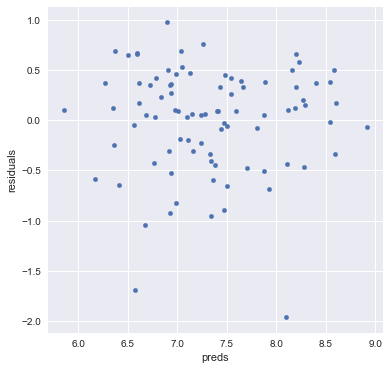

In [88]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_ridge.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Dado que o gráfico de resíduos espalha-se ao redor do eixo zero sem padrões distintos, temos um bom indicativo de que modelos lineares são adequados para a tarefa de predição aqui realizada.

Por fim, vamos aplicar o modelo sobre o conjunto de testes e calcular seu RMSE.

## Predição sobre os dados de teste

In [89]:
predicao = model_ridge.predict(X_test)

In [90]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicao))
rmse

0.39931314937407419

O RMSE retornado para o conjunto de testes apresentou-se um pouco menor do que aquele alcançado com o conjunto de treinamento, indicando que os valores preditos aproximaram-se ainda mais dos valores reais, como podemos ver no gráfico abaixo.

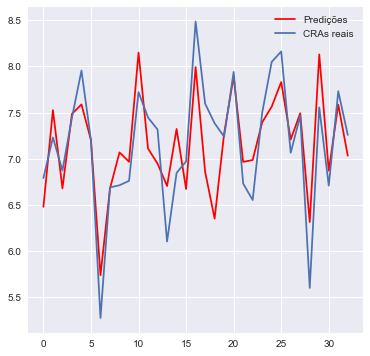

In [91]:
import matplotlib.pyplot as plt

preds = pd.DataFrame({"preds":predicao})
reals = pd.DataFrame({"true":y_test})

plt.plot(preds, label="Predições", color="red")
plt.plot(reals, label="CRAs reais")
plt.legend(loc='best')
plt.show()

## Exportando resultado

In [92]:
solucao = pd.DataFrame({"matricula":test.matricula, "cra":predicao})

solucao.to_csv("tarefa3_sol.csv", index = False)